Notebook to analyse user data

In [153]:
import yaml
import os
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy import inspect

In [154]:
from mrdc import database_utils
from mrdc import data_extraction
from mrdc import data_cleaning

    

In [155]:
base_path = r"C:\Users\abhik\Documents\aicore\multinational-retail-data-centralisation946"
data_connector = database_utils.DatabaseConnector(base_path=base_path, cred_file="db_creds.yaml")
data_extractor = data_extraction.DataExtractor()
data_connector.list_db_table()


['legacy_store_details', 'legacy_users', 'orders_table']

In [156]:
data_df = data_extractor.read_rds_table(data_connector, table_name="legacy_users")
data_df.head()

,index,first_name,last_name,date_of_birth,company,email_address,address,country,country_code,phone_number,join_date,user_uuid
0,0,Sigfried,Noack,1990-09-30,Heydrich Junitz KG,rudi79@winkler.de,Zimmerstr. 1/0\n59015 Gießen,Germany,DE,+49(0) 047905356,2018-10-10,93caf182-e4e9-4c6e-bebb-60a1a9dcf9b8
1,1,Guy,Allen,1940-12-01,Fox Ltd,rhodesclifford@henderson.com,Studio 22a\nLynne terrace\nMcCarthymouth\nTF0 9GH,United Kingdom,GB,(0161) 496 0674,2001-12-20,8fe96c3a-d62d-4eb5-b313-cf12d9126a49
2,2,Harry,Lawrence,1995-08-02,"Johnson, Jones and Harris",glen98@bryant-marshall.co.uk,92 Ann drive\nJoanborough\nSK0 6LR,United Kingdom,GB,+44(0)121 4960340,2016-12-16,fc461df4-b919-48b2-909e-55c95a03fe6b
3,3,Darren,Hussain,1972-09-23,Wheeler LLC,daniellebryan@thompson.org,19 Robinson meadow\nNew Tracy\nW22 2QG,United Kingdom,GB,(0306) 999 0871,2004-02-23,6104719f-ef14-4b09-bf04-fb0c4620acb0
4,4,Garry,Stone,1952-12-20,Warner Inc,billy14@long-warren.com,3 White pass\nHunterborough\nNN96 4UE,United Kingdom,GB,0121 496 0225,2006-09-01,9523a6d3-b2dd-4670-a51a-36aebc89f579


In [157]:
data_df.shape

(15320, 12)

In [158]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15320 entries, 0 to 15319
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          15320 non-null  int64 
 1   first_name     15320 non-null  object
 2   last_name      15320 non-null  object
 3   date_of_birth  15320 non-null  object
 4   company        15320 non-null  object
 5   email_address  15320 non-null  object
 6   address        15320 non-null  object
 7   country        15320 non-null  object
 8   country_code   15320 non-null  object
 9   phone_number   15320 non-null  object
 10  join_date      15320 non-null  object
 11  user_uuid      15320 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.4+ MB


In [159]:
data_df["country"].value_counts()

United Kingdom    9371
Germany           4708
United States     1205
NULL                21
GMRBOMI0O1           1
7ZNO5EBALT           1
3518UD5CE8           1
RQRB7RMTAD           1
PNRMPSYR1J           1
5EFAFD0JLI           1
YOTSVPRBQ7           1
50KUU3PQUF           1
EWE3U0DZIV           1
XN9NGL5C0B           1
S0E37H52ON           1
XGI7FM0VBJ           1
AJ1ENKS3QL           1
I7G4DMDZOZ           1
T4WBZSW0XI           1
Name: country, dtype: int64

In [160]:
data_df = data_df[~data_df.isin(["NULL"]).any(axis=1)]

In [161]:
data_df.shape

(15299, 12)

In [162]:
data_df = data_df[~data_df["country"].str.contains(r'[0-9]')]

In [163]:
data_df["country"].value_counts()

United Kingdom    9371
Germany           4708
United States     1205
Name: country, dtype: int64

In [206]:
data_df["country_code"].value_counts()

GB     9339
DE     4697
US     1200
GGB       6
Name: country_code, dtype: int64

In [208]:
data_df['country_code'] = data_df['country_code'].str.replace('GGB', 'GB')

In [209]:
data_df["country_code"].value_counts()

GB    9345
DE    4697
US    1200
Name: country_code, dtype: int64

In [164]:
data_df.shape

(15284, 12)

In [165]:
data_df = data_df[~data_df["first_name"].str.contains(r'[0-9]')]

In [166]:
data_df.shape

(15284, 12)

In [167]:
data_df = data_df[~data_df["last_name"].str.contains(r'[0-9]')]

In [168]:
data_df.shape

(15284, 12)

In [169]:
import re
pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'

# filter out valid emails using str.contains()
valid_emails = data_df["email_address"].str.contains(pattern)
data_df = data_df[valid_emails]

In [170]:
data_df.shape

(15242, 12)

In [203]:
data_df.head()

,index,first_name,last_name,date_of_birth,company,email_address,address,country,country_code,phone_number,join_date,user_uuid
0,0,Sigfried,Noack,1990-09-30,Heydrich Junitz KG,rudi79@winkler.de,Zimmerstr. 1/0\n59015 Gießen,Germany,DE,+49(0) 047905356,2018-10-10,93caf182-e4e9-4c6e-bebb-60a1a9dcf9b8
1,1,Guy,Allen,1940-12-01,Fox Ltd,rhodesclifford@henderson.com,Studio 22a\nLynne terrace\nMcCarthymouth\nTF0 9GH,United Kingdom,GB,(0161) 496 0674,2001-12-20,8fe96c3a-d62d-4eb5-b313-cf12d9126a49
2,2,Harry,Lawrence,1995-08-02,"Johnson, Jones and Harris",glen98@bryant-marshall.co.uk,92 Ann drive\nJoanborough\nSK0 6LR,United Kingdom,GB,+44(0)121 4960340,2016-12-16,fc461df4-b919-48b2-909e-55c95a03fe6b
3,3,Darren,Hussain,1972-09-23,Wheeler LLC,daniellebryan@thompson.org,19 Robinson meadow\nNew Tracy\nW22 2QG,United Kingdom,GB,(0306) 999 0871,2004-02-23,6104719f-ef14-4b09-bf04-fb0c4620acb0
4,4,Garry,Stone,1952-12-20,Warner Inc,billy14@long-warren.com,3 White pass\nHunterborough\nNN96 4UE,United Kingdom,GB,0121 496 0225,2006-09-01,9523a6d3-b2dd-4670-a51a-36aebc89f579


In [204]:
pattern_numeric = r'[0-9]'

# filter out valid emails using str.contains()
valid_phone_number = data_df["phone_number"].str.contains(pattern_numeric)
data_df = data_df[valid_phone_number]

In [205]:
data_df.head()

,index,first_name,last_name,date_of_birth,company,email_address,address,country,country_code,phone_number,join_date,user_uuid
0,0,Sigfried,Noack,1990-09-30,Heydrich Junitz KG,rudi79@winkler.de,Zimmerstr. 1/0\n59015 Gießen,Germany,DE,+49(0) 047905356,2018-10-10,93caf182-e4e9-4c6e-bebb-60a1a9dcf9b8
1,1,Guy,Allen,1940-12-01,Fox Ltd,rhodesclifford@henderson.com,Studio 22a\nLynne terrace\nMcCarthymouth\nTF0 9GH,United Kingdom,GB,(0161) 496 0674,2001-12-20,8fe96c3a-d62d-4eb5-b313-cf12d9126a49
2,2,Harry,Lawrence,1995-08-02,"Johnson, Jones and Harris",glen98@bryant-marshall.co.uk,92 Ann drive\nJoanborough\nSK0 6LR,United Kingdom,GB,+44(0)121 4960340,2016-12-16,fc461df4-b919-48b2-909e-55c95a03fe6b
3,3,Darren,Hussain,1972-09-23,Wheeler LLC,daniellebryan@thompson.org,19 Robinson meadow\nNew Tracy\nW22 2QG,United Kingdom,GB,(0306) 999 0871,2004-02-23,6104719f-ef14-4b09-bf04-fb0c4620acb0
4,4,Garry,Stone,1952-12-20,Warner Inc,billy14@long-warren.com,3 White pass\nHunterborough\nNN96 4UE,United Kingdom,GB,0121 496 0225,2006-09-01,9523a6d3-b2dd-4670-a51a-36aebc89f579


In [173]:
data_df.isnull().sum()

index            0
first_name       0
last_name        0
date_of_birth    0
company          0
email_address    0
address          0
country          0
country_code     0
phone_number     0
join_date        0
user_uuid        0
dtype: int64

In [174]:
data_df.isna().sum()

index            0
first_name       0
last_name        0
date_of_birth    0
company          0
email_address    0
address          0
country          0
country_code     0
phone_number     0
join_date        0
user_uuid        0
dtype: int64

In [175]:
if pd.to_datetime(data_df['date_of_birth'], format='%Y-%m-%d', errors='coerce').notnull().all():
    print("no error")
else:
    print("wrong date format present")
    

wrong date format present


In [176]:
try:
    pd.to_datetime(data_df['date_of_birth'], format='%Y-%m-%d', errors="raise")
except ValueError as e:
    print(e)

time data "1968 October 16" at position 359 doesn't match format specified


In [177]:
nan_df = pd.to_datetime(data_df['date_of_birth'], format='%Y-%m-%d', errors="coerce")
# above will return NaN when the format not match 
clean_df = data_df[nan_df.notna()]

In [178]:
pd.to_datetime(clean_df['date_of_birth'], format='%Y-%m-%d')

0       1990-09-30
1       1940-12-01
2       1995-08-02
3       1972-09-23
4       1952-12-20
           ...    
15315   1943-08-09
15316   1948-08-20
15317   1940-10-09
15318   1952-06-04
15319   1994-03-27
Name: date_of_birth, Length: 15226, dtype: datetime64[ns]

In [179]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15226 entries, 0 to 15319
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          15226 non-null  int64 
 1   first_name     15226 non-null  object
 2   last_name      15226 non-null  object
 3   date_of_birth  15226 non-null  object
 4   company        15226 non-null  object
 5   email_address  15226 non-null  object
 6   address        15226 non-null  object
 7   country        15226 non-null  object
 8   country_code   15226 non-null  object
 9   phone_number   15226 non-null  object
 10  join_date      15226 non-null  object
 11  user_uuid      15226 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.5+ MB


In [180]:

data_df.describe()


,index
count,15242.000000
mean,7659.406508
std,4423.553882
min,0.000000
25%,3829.250000
50%,7659.500000
75%,11490.750000
max,15319.000000


In [212]:

data_df["company"].unique()

array(['Heydrich Junitz KG', 'Fox Ltd', 'Johnson, Jones and Harris', ...,
       'Robinson-Harris', 'Taylor, Fry and Jones',
       'Phillips, Brown and Powell'], dtype=object)

In [181]:
pdf_df= data_extractor.retrieve_pdf_data("https://data-handling-public.s3.eu-west-1.amazonaws.com/card_details.pdf")


In [182]:
pdf_df.head()

,card_number,expiry_date,card_provider,date_payment_confirmed
0,30060773296197,09/26,Diners Club / Carte Blanche,2015-11-25
1,349624180933183,10/23,American Express,2001-06-18
2,3529023891650490,06/23,JCB 16 digit,2000-12-26
3,213142929492281,09/27,JCB 15 digit,2011-02-12
4,502067329974,10/25,Maestro,1997-03-13


In [183]:
pdf_df.shape

(15309, 4)

In [184]:
pdf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15309 entries, 0 to 18
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   card_number             15309 non-null  object
 1   expiry_date             15309 non-null  object
 2   card_provider           15309 non-null  object
 3   date_payment_confirmed  15309 non-null  object
dtypes: object(4)
memory usage: 598.0+ KB


In [222]:
pdf_df.isna().sum()

card_number               0
expiry_date               0
card_provider             0
date_payment_confirmed    0
dtype: int64

In [185]:
pdf_df.describe()

,card_number,expiry_date,card_provider,date_payment_confirmed
count,15309,15309,15309,15309
unique,15299,136,25,8270
top,NULL,03/28,VISA 16 digit,NULL
freq,11,163,2426,11


In [186]:
pdf_df.isnull().sum()

card_number               0
expiry_date               0
card_provider             0
date_payment_confirmed    0
dtype: int64

In [187]:
try:
    pd.to_datetime(pdf_df['date_payment_confirmed'], format='%Y-%m-%d', errors="raise")
except ValueError as e:
    print(e)

time data "NULL" at position 377 doesn't match format specified


In [188]:
pdf_df.iloc[[377]]

,card_number,expiry_date,card_provider,date_payment_confirmed
47,NULL,NULL,NULL,NULL


In [189]:
pdf_df[pdf_df['card_provider'].str.contains("NULL")]

,card_number,expiry_date,card_provider,date_payment_confirmed
47,NULL,NULL,NULL,NULL
22,NULL,NULL,NULL,NULL
4,NULL,NULL,NULL,NULL
53,NULL,NULL,NULL,NULL
14,NULL,NULL,NULL,NULL
25,NULL,NULL,NULL,NULL
16,NULL,NULL,NULL,NULL
21,NULL,NULL,NULL,NULL
29,NULL,NULL,NULL,NULL
6,NULL,NULL,NULL,NULL


In [190]:
pdf_df_clean = pdf_df[~pdf_df.isin(["NULL"]).any(axis=1)]

In [191]:
try:
    pd.to_datetime(pdf_df_clean['date_payment_confirmed'], format='%Y-%m-%d', errors="raise")
except ValueError as e:
    print(e)

time data "GTC9KBWJO9" at position 826 doesn't match format specified


In [192]:
nan_df = pd.to_datetime(pdf_df_clean['date_payment_confirmed'], format='%Y-%m-%d', errors="coerce")
pdf_df_clean_date = pdf_df_clean[nan_df.notna()]

In [193]:
pdf_df_clean_date.head()

,card_number,expiry_date,card_provider,date_payment_confirmed
0,30060773296197,09/26,Diners Club / Carte Blanche,2015-11-25
1,349624180933183,10/23,American Express,2001-06-18
2,3529023891650490,06/23,JCB 16 digit,2000-12-26
3,213142929492281,09/27,JCB 15 digit,2011-02-12
4,502067329974,10/25,Maestro,1997-03-13


In [194]:
try:
    pd.to_datetime(pdf_df_clean_date['date_payment_confirmed'], format='%Y-%m-%d', errors="raise")
except ValueError as e:
    print(e)

In [195]:
try:
    pd.to_datetime(pdf_df_clean_date['expiry_date'], format='%m/%d', errors="raise")
except ValueError as e:
    print(e)

day is out of range for month


In [196]:
pdf_df_clean_date.shape

(15277, 4)

In [197]:
nan_df_expiry = pd.to_datetime(pdf_df_clean_date['expiry_date'], format='%m/%d', errors="coerce")
pdf_df_clean_date_expiry = pdf_df_clean_date[nan_df_expiry.notna()]

In [198]:
pdf_df_clean_date_expiry.shape

(13146, 4)

In [199]:
pdf_df_clean_date_expiry["card_provider"].unique()

array(['Diners Club / Carte Blanche', 'American Express', 'JCB 16 digit',
       'JCB 15 digit', 'Maestro', 'Discover', 'Mastercard',
       'VISA 19 digit', 'VISA 16 digit', 'VISA 13 digit'], dtype=object)

<AxesSubplot:>

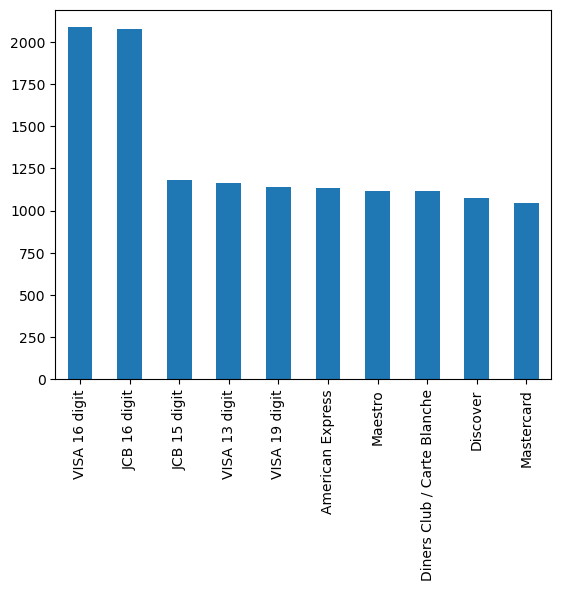

In [200]:
pdf_df_clean_date_expiry["card_provider"].value_counts().plot(kind="bar")

In [201]:
pdf_df_clean_date_expiry['card_number'].str.contains('[^a-zA-Z]')

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
     ... 
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
Name: card_number, Length: 13146, dtype: object

In [214]:
pdf_df_clean_date_expiry.head()

,card_number,expiry_date,card_provider,date_payment_confirmed
0,30060773296197,09/26,Diners Club / Carte Blanche,2015-11-25
1,349624180933183,10/23,American Express,2001-06-18
2,3529023891650490,06/23,JCB 16 digit,2000-12-26
3,213142929492281,09/27,JCB 15 digit,2011-02-12
4,502067329974,10/25,Maestro,1997-03-13


In [217]:
pdf_df_clean_date_expiry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13146 entries, 0 to 17
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   card_number             13146 non-null  object
 1   expiry_date             13146 non-null  object
 2   card_provider           13146 non-null  object
 3   date_payment_confirmed  13146 non-null  object
dtypes: object(4)
memory usage: 513.5+ KB


In [219]:
pattern_numeric = r'[0-9]'

# filter out valid emails using str.contains()
valid_card_number = pdf_df_clean_date_expiry["card_number"].str.contains(pattern_numeric, na=False)
pdf_df_final  = pdf_df_clean_date_expiry[valid_card_number]

In [220]:
pdf_df_final.head()

,card_number,expiry_date,card_provider,date_payment_confirmed
0,4145662949755970,10/25,VISA 16 digit,2019-01-30
3,6011887212979720,07/29,Discover,1996-04-05
4,6011592595426290,05/26,Discover,1993-04-27
5,213164174481249,08/29,JCB 15 digit,2020-04-22
6,6521667118670950,01/28,Discover,2008-12-04


In [15]:
import requests


In [28]:
headers = {
        "Content-Type": "application/json", 
        "x-api-key": "yFBQbwXe9J3sd6zWVAMrK6lcxxr0q1lr2PT6DDMX"
        }
response = requests.get("https://aqj7u5id95.execute-api.eu-west-1.amazonaws.com/prod/number_stores", headers)
response.json()

{'message': 'Forbidden'}

In [19]:
list_of_dict= []
for i in range(5):
    uri = f"https://aqj7u5id95.execute-api.eu-west-1.amazonaws.com/prod/store_details/{i}"
    response = requests.get(uri, headers=headers)
    list_of_dict.append(response.json())

In [20]:
import pandas as pd
store_df = pd.DataFrame(list_of_dict)

In [21]:
store_df.head()

,index,address,longitude,lat,locality,store_code,staff_numbers,opening_date,store_type,latitude,country_code,continent
0,0,N/A,N/A,N/A,N/A,WEB-1388012W,325,2010-06-12,Web Portal,None,GB,Europe
1,1,"Flat 72W\nSally isle\nEast Deantown\nE7B 8EB, ...",51.62907,None,High Wycombe,HI-9B97EE4E,34,1996-10-25,Local,-0.74934,GB,Europe
2,2,"Heckerstraße 4/5\n50491 Säckingen, Landshut",48.52961,None,Landshut,LA-0772C7B9,92,2013-04-12,Super Store,12.16179,DE,Europe
3,3,"5 Harrison tunnel\nSouth Lydia\nWC9 2BE, Westbury",51.26,None,Westbury,WE-1DE82CEE,69,2014-01-02,Super Store,-2.1875,GB,Europe
4,4,Studio 6\nStephen landing\nSouth Simon\nB77 2W...,53.0233,None,Belper,BE-18074576,35,2019-09-09,Local,-1.48119,GB,Europe
